1. Are those with children more likely to feel stress than adults without dependences?
2. How does the number of dependencies and their age group affect stress levels in parents/head of household (HoH)?
3. Do stress levels differ between male and female population?
4. Do stress levels differ between male and female parents?


PHQ4_1-4 - Patient health questionnaire, response scale of 1-4 for frequency
1. Little interest or pleasure in doing things
2. Feeling down, depressed, or hopeless
3. Feeling nervous, anxious, or on edge
4. Not being able to stop or control worrying

    Recoded answers:
        1. Not at all
        2. Several days
        3. More than half the days
        4. Nearly everyday
        
child_age_1-5 - Number of children within the 5 age groups
1. 0-2
2. 3-11
3. 12-18
4. 19+
5. N/A


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max.columns", None)
sns.set_style("darkgrid")

In [3]:
ucl_data_org = pd.read_csv('covid19tracker_recoded.csv')

In [4]:
ucl_data_org.head()

,state,endtime,qweek,gender,age,household_size,household_children,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,child_education_1,child_education_2,child_education_3,child_education_4,i10_health,i11_health,r1_1,WCRV_4,employment_status,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,CORE_B2_4,w4_1,w4_2,w4_3,w4_4,w4_5,w4_6,w4_7,w4_8,w4_9,w4_10,w4_11,w4_99,w4b,employment_status.cat,week,PHQ4_sum,child_education_sum
0,California,02/04/2020 08:11,week 1,Female,33,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,Not working,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,NaN,NaN
1,Pennsylvania,02/04/2020 08:12,week 1,Male,38,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,Full time employment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,NaN
2,Florida,02/04/2020 08:15,week 1,Female,48,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,Full time employment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,NaN
3,California,02/04/2020 08:15,week 1,Male,31,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,Unemployed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,NaN,NaN
4,Florida,02/04/2020 08:15,week 1,Female,69,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,Retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


In [5]:
ucl_data_org.columns

Index(['state', 'endtime', 'qweek', 'gender', 'age', 'household_size',
       'household_children', 'child_age_1', 'child_age_2', 'child_age_3',
       'child_age_4', 'child_age_5', 'child_education_1', 'child_education_2',
       'child_education_3', 'child_education_4', 'i10_health', 'i11_health',
       'r1_1', 'WCRV_4', 'employment_status', 'cantril_ladder', 'PHQ4_1',
       'PHQ4_2', 'PHQ4_3', 'PHQ4_4', 'CORE_B2_4', 'w4_1', 'w4_2', 'w4_3',
       'w4_4', 'w4_5', 'w4_6', 'w4_7', 'w4_8', 'w4_9', 'w4_10', 'w4_11',
       'w4_99', 'w4b', 'employment_status.cat', 'week', 'PHQ4_sum',
       'child_education_sum'],
      dtype='object')

In [6]:
ucl_data = ucl_data_org[['state', 'endtime', 'gender', 'age', 'household_size',
       'household_children', 'child_age_1', 'child_age_2', 'child_age_3',
       'child_age_4', 'child_age_5', 'cantril_ladder', 'PHQ4_1',
       'PHQ4_2', 'PHQ4_3', 'PHQ4_4', 'PHQ4_sum']]
ucl_data = ucl_data[ucl_data['PHQ4_sum'].notna()]
ucl_data

,state,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,PHQ4_sum
4976,Georgia,30/04/2020 16:33,Male,40,3.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,2.0,1.0,3.0,10.0
4977,New Jersey,30/04/2020 16:31,Female,62,3.0,0.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,2.0,1.0,6.0
4978,Indiana,30/04/2020 16:32,Female,61,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,1.0,1.0,1.0,4.0
4979,Virginia,30/04/2020 16:34,Female,60,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0,1.0,1.0,1.0,5.0
4980,Michigan,30/04/2020 16:34,Female,37,2.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,3.0,3.0,10.0
4981,Michigan,30/04/2020 16:34,Male,32,3.0,1.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,2.0,2.0,2.0,8.0
4982,California,30/04/2020 16:34,Male,70,2.0,0.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,4.0
4983,Ohio,30/04/2020 16:35,Male,58,3.0,1.0,NaN,NaN,NaN,NaN,NaN,7.0,1.0,2.0,2.0,2.0,7.0
4984,Pennsylvania,30/04/2020 16:35,Female,32,3.0,1.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,1.0,1.0,1.0,4.0
4985,New Jersey,30/04/2020 16:36,Male,46,1.0,0.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,4.0


In [7]:
ucl_data['household_children'].value_counts(normalize=True)

0.0    0.674899
1.0    0.127468
2.0    0.115291
3.0    0.045354
4.0    0.020941
5.0    0.016047
Name: household_children, dtype: float64

In [8]:
ucl_data['parent'] = np.where(ucl_data['household_children'] > 0, 1, 0)
ucl_data

,state,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,PHQ4_sum,parent
4976,Georgia,30/04/2020 16:33,Male,40,3.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,2.0,1.0,3.0,10.0,1
4977,New Jersey,30/04/2020 16:31,Female,62,3.0,0.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,2.0,1.0,6.0,0
4978,Indiana,30/04/2020 16:32,Female,61,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,1.0,1.0,1.0,4.0,0
4979,Virginia,30/04/2020 16:34,Female,60,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0,1.0,1.0,1.0,5.0,0
4980,Michigan,30/04/2020 16:34,Female,37,2.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,3.0,3.0,10.0,0
4981,Michigan,30/04/2020 16:34,Male,32,3.0,1.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,2.0,2.0,2.0,8.0,1
4982,California,30/04/2020 16:34,Male,70,2.0,0.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,4.0,0
4983,Ohio,30/04/2020 16:35,Male,58,3.0,1.0,NaN,NaN,NaN,NaN,NaN,7.0,1.0,2.0,2.0,2.0,7.0,1
4984,Pennsylvania,30/04/2020 16:35,Female,32,3.0,1.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,1.0,1.0,1.0,4.0,1
4985,New Jersey,30/04/2020 16:36,Male,46,1.0,0.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,4.0,0


In [9]:
ucl_data['parent'].value_counts()

0    12006
1     5713
Name: parent, dtype: int64

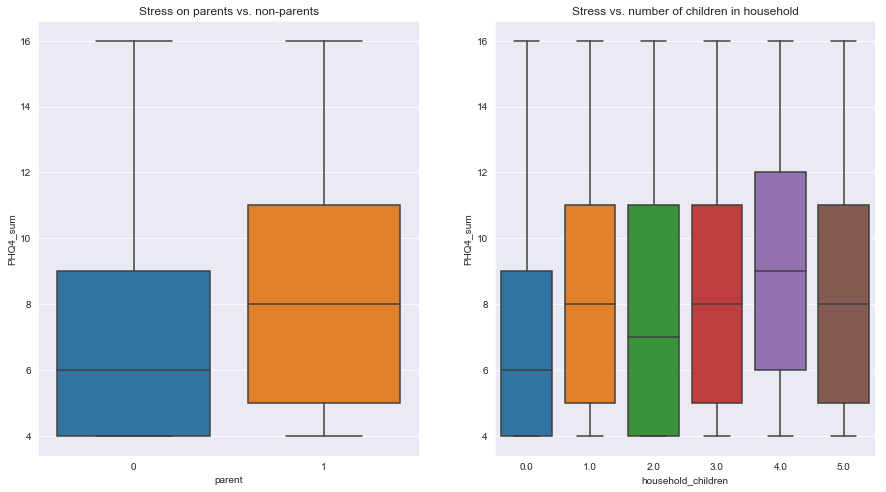

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15, 8));
sns.boxplot(ax=ax[0], x='parent', y='PHQ4_sum', data=ucl_data);
ax[0].set_title("Stress on parents vs. non-parents");
sns.boxplot(ax=ax[1], x='household_children', y='PHQ4_sum', data=ucl_data);
ax[1].set_title("Stress vs. number of children in household");

#labels need to be changed later ie. "5 or more")

parents are more likely to be stressed than non parents

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
y = ucl_data.PHQ4_sum
X = ucl_data[['household_children', 'household_size']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
#lr = LinearRegression().fit(X_train,y_train)

In [14]:
ucl_data.gender.value_counts()

Female    9468
Male      8251
Name: gender, dtype: int64

Text(0.5, 1.0, 'Not being able to stop or control worrying')

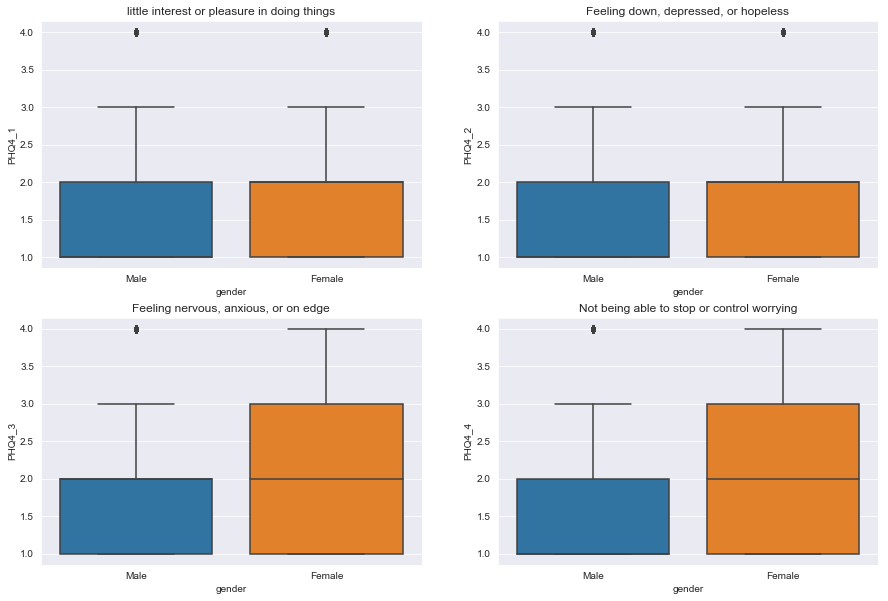

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0,0], x= 'gender', y= 'PHQ4_1', data= ucl_data)
axes[0,0].set_title("little interest or pleasure in doing things")
sns.boxplot(ax=axes[0,1], x= 'gender', y= 'PHQ4_2', data= ucl_data)
axes[0,1].set_title("Feeling down, depressed, or hopeless")
sns.boxplot(ax=axes[1,0], x= 'gender', y= 'PHQ4_3', data= ucl_data)
axes[1,0].set_title("Feeling nervous, anxious, or on edge")
sns.boxplot(ax=axes[1,1], x= 'gender', y= 'PHQ4_4', data= ucl_data)
axes[1,1].set_title("Not being able to stop or control worrying")

 1. Not at all
 2. Several days
 3. More than half the days
 4. Nearly everyday
 
 Women are more likely to feel nervous, anxious, and worry more then men.
 

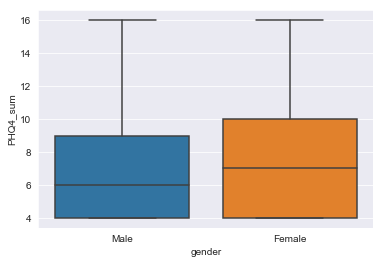

In [16]:
sns.boxplot(x = 'gender', y= 'PHQ4_sum', data= ucl_data)

# Stress vs. number dependencies

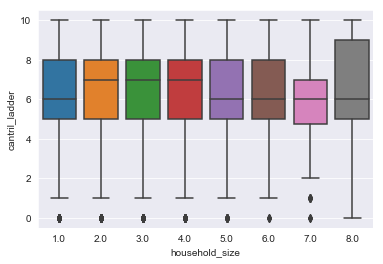

In [17]:
sns.boxplot(x='household_size', y= 'cantril_ladder', data=ucl_data)

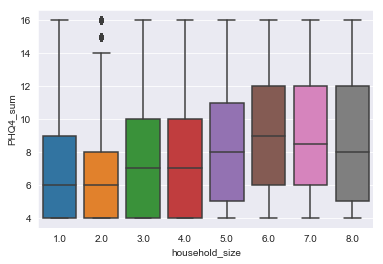

In [18]:
sns.boxplot(x= 'household_size', y= 'PHQ4_sum', data=ucl_data)

In [19]:
#household_children/(household_size-household_children) = children/adult ratio
ucl_data['children/total_size ratio'] = ucl_data.apply(lambda x: x.household_children/x.household_size, axis=1)

In [20]:
male_df = ucl_data[ucl_data['gender']== 'Male']
female_df = ucl_data[ucl_data['gender']== 'Female']
female_df

,state,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,PHQ4_sum,parent,children/total_size ratio
4977,New Jersey,30/04/2020 16:31,Female,62,3.0,0.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,2.0,1.0,6.0,0,0.000000
4978,Indiana,30/04/2020 16:32,Female,61,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,1.0,1.0,1.0,4.0,0,0.000000
4979,Virginia,30/04/2020 16:34,Female,60,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0,1.0,1.0,1.0,5.0,0,0.000000
4980,Michigan,30/04/2020 16:34,Female,37,2.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,3.0,3.0,10.0,0,0.000000
4984,Pennsylvania,30/04/2020 16:35,Female,32,3.0,1.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,1.0,1.0,1.0,4.0,1,0.333333
4987,Texas,30/04/2020 16:36,Female,66,2.0,0.0,NaN,NaN,NaN,NaN,NaN,7.0,1.0,1.0,2.0,2.0,6.0,0,0.000000
4988,North Carolina,30/04/2020 16:36,Female,58,2.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,3.0,2.0,2.0,2.0,9.0,0,0.000000
4989,California,30/04/2020 16:36,Female,64,5.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,3.0,3.0,3.0,3.0,12.0,1,0.400000
4992,Georgia,30/04/2020 16:37,Female,59,3.0,0.0,NaN,NaN,NaN,NaN,NaN,6.0,1.0,1.0,1.0,1.0,4.0,0,0.000000
4993,Florida,30/04/2020 16:37,Female,64,1.0,0.0,NaN,NaN,NaN,NaN,NaN,7.0,3.0,4.0,4.0,4.0,15.0,0,0.000000


In [21]:
female_count_df = female_df.PHQ4_sum.value_counts(normalize=True).rename_axis('PHQ4_sum').reset_index(name='counts')
male_count_df = male_df.PHQ4_sum.value_counts(normalize=True).rename_axis('PHQ4_sum').reset_index(name='counts')
#print(female_count_df['female_counts'].sum())
female_count_df['gender'] = 'female'
male_count_df['gender'] = 'male'
count_df = pd.concat([male_count_df, female_count_df])
count_df

,PHQ4_sum,counts,gender
0,4.0,0.367955,male
1,5.0,0.095382,male
2,6.0,0.091262,male
3,8.0,0.091019,male
4,7.0,0.074052,male
5,10.0,0.050297,male
6,12.0,0.047873,male
7,9.0,0.046297,male
8,11.0,0.038904,male
9,16.0,0.031875,male


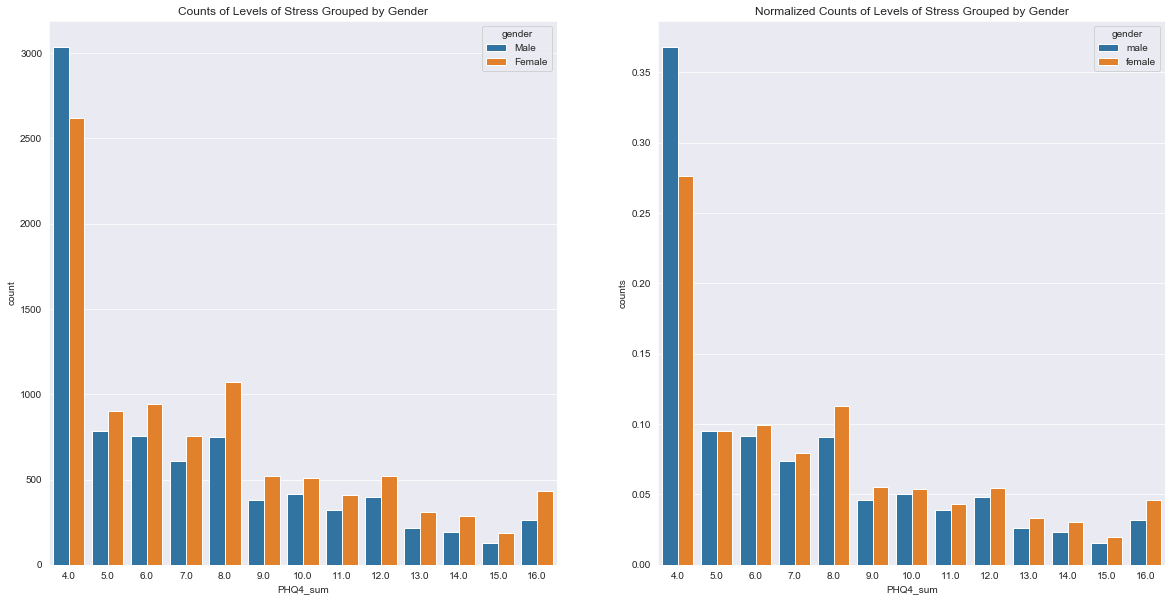

In [22]:
fig, axes2 = plt.subplots(1, 2, figsize=(20, 10));
sns.countplot(ax=axes2[0], x='PHQ4_sum', hue="gender", dodge=True, data=ucl_data);
axes2[0].set_title('Counts of Levels of Stress Grouped by Gender');
sns.barplot(x='PHQ4_sum', y='counts', hue='gender', dodge=True, data=count_df);
axes2[1].set_title('Normalized Counts of Levels of Stress Grouped by Gender');

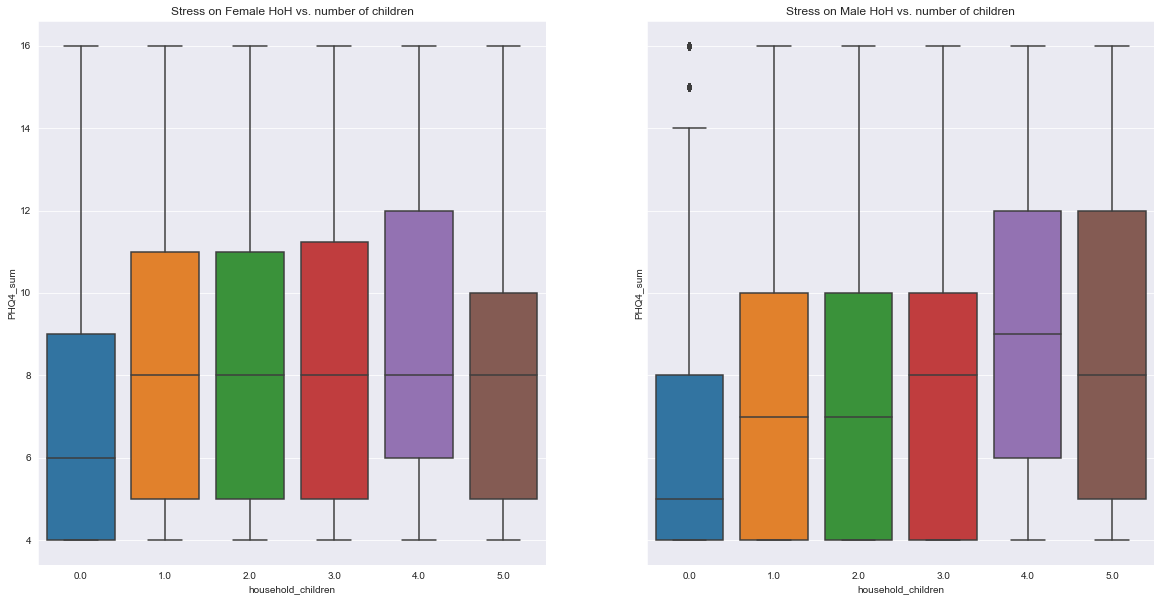

In [23]:
fig, axes3 = plt.subplots(1, 2, figsize=(20, 10), sharey=True);
sns.boxplot(ax=axes3[0], x= "household_children", y="PHQ4_sum", data=female_df);
axes3[0].set_title('Stress on Female HoH vs. number of children');
sns.boxplot(ax=axes3[1], x="household_children", y= "PHQ4_sum", data=male_df);
axes3[1].set_title('Stress on Male HoH vs. number of children');

# Correlation Matrix

In [24]:
corr = ucl_data.corr()
corr

,age,household_size,household_children,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,PHQ4_sum,parent,children/total_size ratio
age,1.000000,-0.396978,-0.331980,-0.274074,-0.218525,0.074269,0.455525,-0.030385,0.189270,-0.243721,-0.274467,-0.293526,-0.256054,-0.304253,-0.351867,-0.265561
household_size,-0.396978,1.000000,0.619192,0.106936,0.263018,0.211310,-0.041851,-0.227143,-0.019818,0.111519,0.124031,0.139157,0.133014,0.144992,0.553340,0.332283
household_children,-0.331980,0.619192,1.000000,-0.011703,0.162962,0.146456,0.029151,0.003065,0.002568,0.105278,0.106074,0.112316,0.117055,0.125716,0.831663,0.849205
child_age_1,-0.274074,0.106936,-0.011703,1.000000,0.013980,-0.201549,-0.228198,-0.218817,0.012234,0.079714,0.038519,0.052848,0.034883,0.058466,NaN,-0.137002
child_age_2,-0.218525,0.263018,0.162962,0.013980,1.000000,-0.041810,-0.257096,-0.359711,0.042190,0.032024,0.045315,0.060983,0.069031,0.059507,NaN,-0.121379
child_age_3,0.074269,0.211310,0.146456,-0.201549,-0.041810,1.000000,-0.041224,-0.300499,0.033220,0.011774,-0.003473,0.071087,0.046787,0.036512,NaN,-0.071977
child_age_4,0.455525,-0.041851,0.029151,-0.228198,-0.257096,-0.041224,1.000000,-0.215166,0.016740,-0.083290,-0.094871,-0.108723,-0.111701,-0.114031,NaN,0.116660
child_age_5,-0.030385,-0.227143,0.003065,-0.218817,-0.359711,-0.300499,-0.215166,1.000000,-0.151089,-0.018179,0.043904,-0.017144,0.004064,0.003665,NaN,0.259665
cantril_ladder,0.189270,-0.019818,0.002568,0.012234,0.042190,0.033220,0.016740,-0.151089,1.000000,-0.362382,-0.377367,-0.333067,-0.337853,-0.401558,0.003746,0.003617
PHQ4_1,-0.243721,0.111519,0.105278,0.079714,0.032024,0.011774,-0.083290,-0.018179,-0.362382,1.000000,0.727684,0.624657,0.632880,0.848902,0.108564,0.094459


Household size is only weakly positively correlated with perceived level of stress (PHQ4_1 - PHQ4_4, and PHQ4_sum), similarly with the number of children in the household. PHQ4_sum is only somewhat negatively correlated with cantril_ladder variable. 

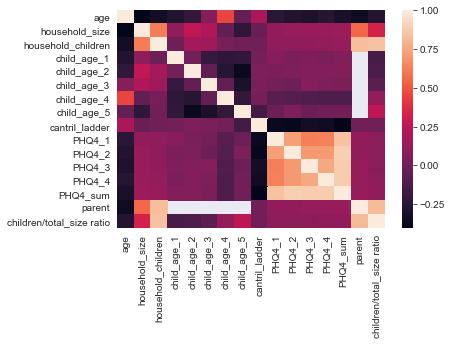

In [25]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)